In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv('Penalty_stats_propre_19-20.csv', sep=';', encoding='latin')
df.head(5)

,Id,Competition,Journee,Date,Home team,Away team,Team taking pen,Pen taker,Minute,LtD game-changing pen,DtW game-changing pen,L no game-changing,W no game-changing,Scored,PT sub,PT position,Team win,Last Goal
0,1,Premier League,1,10/08/2019,West Ham,Manchester City,Away,Sergio Aguero,84.0,NO,NO,NO,YES,NO,YES,ST,YES,NO
1,2,Premier League,1,10/08/2019,West Ham,Manchester City,Away,Sergio Aguero,86.0,NO,NO,NO,YES,YES,YES,ST,YES,NO
2,3,Premier League,1,11/08/2019,Manchester United,Chelsea,Home,Marcus Rashford,18.0,NO,YES,NO,NO,YES,NO,W,YES,NO
3,4,Premier League,2,17/08/2019,Aston Villa,Bournemouth,Away,Joshua King,2.0,NO,YES,NO,NO,YES,NO,OM,YES,NO
4,5,Premier League,2,19/08/2019,Wolverhampton,Manchester United,Away,Paul Pogba,68.0,NO,YES,NO,NO,NO,NO,DM,NO,YES


# Separando as cobraças de penalties por posições em campo

In [34]:
temp_df = df.groupby(['PT position', 'Scored']).size()
temp_df

PT position  Scored
CB           NO          1
             YES         6
DM           NO         11
             YES        49
LD           NO          7
             YES        11
OM           NO         11
             YES        57
ST           NO         54
             YES       187
W            NO         26
             YES        74
dtype: int64

<Axes: xlabel='PT position,Scored'>

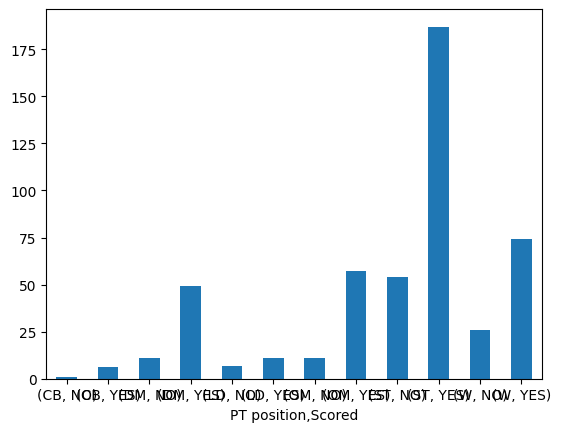

In [59]:
temp_df.plot.bar(x='Scored', stacked=True, rot=0)